In [19]:
# !pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# ASSET ALLOCATION & BACKTEST

In [22]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

mf = pd.read_excel('MF-AssetUniverseMain.xlsx', sheet_name="AssetUniverse")[['FundName', 'ISIN', 'Industry', 'Sector']]
mf

,FundName,ISIN,Industry,Sector
0,HDFC Gold Fund-Growth,INF179K01LC5,Commodities,Gold
1,SBI Gold Fund-Growth,INF200K01HA1,Commodities,Gold
2,Aditya Birla Sun Life Liquid Fund Retail- Growth,INF209K01RU9,Cash,Liquid
3,Axis Liquid Fund-Growth,INF846K01412,Cash,Liquid
4,Baroda BNP Paribas Liquid Fund Regular-Growth,INF955L01575,Cash,Liquid
...,...,...,...,...
159,Canara Robeco Equity Tax Saver Regular - Growth,INF760K01100,Equity,ELSS
160,IDFC Tax Advantage (ELSS) Fund Regular-Growth,INF194K01292,Equity,ELSS
161,Kotak Tax Saver Fund Regular-Growth,INF174K01369,Equity,ELSS
162,Mirae Asset Tax Saver Fund Regular-Growth,INF769K01DK3,Equity,ELSS


In [23]:
data3 = pd.read_excel('MF_POC.xlsx')
data3.index = pd.to_datetime(data3.Date, format='%Y-%m-%d', infer_datetime_format=True)
data3 = data3.drop('Date', axis=1)
# remove index name
# data3.index.name = None

# ffill
data3 = data3.fillna(method='ffill')
data3.tail(10)

,INF204K01927,INF903J01629,INF760K01241,INF769K01135,INF200K01VR6,INF090I01957,INF789F01463,INF760K01019,INF090I01239,INF109K01BZ4,...,INF109K01BH2,INF173K01585,INF760K01282,INF179K01AE4,INF109K01902,INF174K01393,INF200K01859,INF179K01AP0,INF109K01761,INF966L01200
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-17,406.7720,65.9487,69.17,57.752,204.3952,87.5377,103.9287,224.50,1003.5215,52.25,...,52.78,26.4988,77.4975,63.1087,58.3307,44.7059,56.0590,50.185,480.8440,88.9438
2023-01-18,408.2809,66.3316,69.39,57.984,205.0863,87.7607,104.5279,225.65,1009.7570,52.47,...,52.87,26.5546,77.5908,63.2177,58.3968,44.7512,56.0928,50.314,482.0107,89.5331
2023-01-19,407.9633,66.3799,69.11,57.647,204.4847,87.8404,104.3459,225.22,1006.9072,52.39,...,52.88,26.5454,77.5871,63.2290,58.3693,44.7834,56.1064,50.273,482.0553,89.5894
2023-01-20,407.7652,66.5536,68.53,57.089,202.3103,87.7992,103.6918,223.84,1004.4937,52.08,...,52.74,26.4923,77.4285,63.2018,58.3130,44.7398,56.0348,50.217,481.1600,89.5930
2023-01-23,410.2627,66.9188,68.90,57.260,203.2971,88.4626,104.4661,224.20,1007.9276,52.32,...,52.82,26.5344,77.4911,63.3056,58.3763,44.7981,56.1073,50.339,482.2822,89.7283
2023-01-24,408.6272,66.7651,68.93,57.447,204.0881,88.4162,104.5486,223.90,1005.0932,52.27,...,52.84,26.5262,77.4842,63.2692,58.3493,44.7798,56.0377,50.329,482.0655,89.6248
2023-01-25,399.2482,65.3958,68.14,57.098,203.4191,88.0318,103.7939,221.22,989.0294,51.79,...,52.69,26.2771,77.2681,63.0604,58.2225,44.6656,55.9406,49.961,480.3458,88.5197
2023-01-27,388.7801,63.5476,67.52,57.083,203.4655,87.5329,102.7775,218.15,973.3188,51.19,...,52.42,25.9981,76.9575,62.7981,58.0268,44.4500,55.7107,49.593,476.4717,86.6702
2023-01-30,388.8709,63.5404,67.58,56.951,203.1653,87.2557,102.7046,218.54,973.3991,51.33,...,52.43,25.9761,76.9551,62.7726,58.0171,44.4332,55.7460,49.526,476.8874,86.3354


In [24]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 13 00:57:27 2021

@author: danycajas
"""

import os
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
os.environ['NUMBA_DISABLE_JIT'] = '1'  # uncomment this if you want to use pypfopt within simulation
from numba import njit
import json

import vectorbt as vbt # version 0.16.1
from vectorbt.generic.nb import nanmean_nb
from vectorbt.portfolio.nb import create_order_nb, auto_call_seq_ctx_nb
from vectorbt.portfolio.enums import SizeType, Direction


In [25]:
Y = data3.pct_change().dropna()
display(Y.tail())

,INF204K01927,INF903J01629,INF760K01241,INF769K01135,INF200K01VR6,INF090I01957,INF789F01463,INF760K01019,INF090I01239,INF109K01BZ4,...,INF109K01BH2,INF173K01585,INF760K01282,INF179K01AE4,INF109K01902,INF174K01393,INF200K01859,INF179K01AP0,INF109K01761,INF966L01200
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-24,-0.003986,-0.002297,0.000435,0.003266,0.003891,-0.000525,0.000790,-0.001338,-0.002812,-0.000956,...,0.000379,-0.000309,-0.000089,-0.000575,-0.000463,-0.000408,-0.001240,-0.000199,-0.000449,-0.001153
2023-01-25,-0.022952,-0.020509,-0.011461,-0.006075,-0.003278,-0.004348,-0.007219,-0.011970,-0.015982,-0.009183,...,-0.002839,-0.009391,-0.002789,-0.003300,-0.002173,-0.002550,-0.001733,-0.007312,-0.003567,-0.012330
2023-01-27,-0.026220,-0.028262,-0.009099,-0.000263,0.000228,-0.005667,-0.009792,-0.013878,-0.015885,-0.011585,...,-0.005124,-0.010618,-0.004020,-0.004160,-0.003361,-0.004827,-0.004110,-0.007366,-0.008065,-0.020894
2023-01-30,0.000234,-0.000113,0.000889,-0.002312,-0.001475,-0.003167,-0.000709,0.001788,0.000083,0.002735,...,0.000191,-0.000846,-0.000031,-0.000406,-0.000167,-0.000378,0.000634,-0.001351,0.000872,-0.003863
2023-01-31,0.008155,0.005574,0.009174,0.009183,0.006923,0.003287,0.005505,0.004072,0.008340,0.006039,...,0.001335,0.003049,0.001740,0.003264,0.001045,0.004371,0.000000,0.002827,0.000000,0.007654


In [26]:
industry = mf[['ISIN', 'Industry', 'Sector']]

In [27]:
import riskfolio.ConstraintsFunctions as cf

clusters = cf.assets_clusters(returns=Y,
                              correlation='spearman',
                              linkage='ward',
                              k=None,
                              max_k=11,
                              leaf_order=True)

clusters = clusters.sort_index()
clusters = pd.merge(clusters,
                    industry[['ISIN', 'Sector']],
                    left_on='Assets',
                    right_on='ISIN')

del clusters['ISIN']

constraints = {
    'Disabled': [False, False, False],
    'Type': ['All Assets', 'All Classes', 'All Classes'],
    'Set': ['', 'Clusters', 'Sector'],
    'Position': ['', '', ''],
    'Sign': ['<=', '<=', '<='],
    'Weight': [0.25, 0.4, 0.4],
    'Type Relative': ['', '', ''],
    'Relative Set': ['', '', ''],
    'Relative': ['', '', ''],
    'Factor': ['', '', '']
}

constraints = pd.DataFrame(constraints)

A, B = cf.assets_constraints(constraints, clusters)

In [28]:
vbt.settings.returns['year_freq'] = '252 days'

num_tests = 2000
ann_factor = data3.vbt.returns(freq='D').ann_factor


def prep_func_nb(simc, every_nth):
    # Define rebalancing days
    simc.active_mask[:, :] = False
    simc.active_mask[every_nth::every_nth, :] = True
    return ()


def segment_prep_func_nb(sc, find_weights_nb, rm, model, obj, history_len,
                         ann_factor, num_tests, srb_sharpe):
    if history_len == -1:
        # Look back at the entire time period
        close = sc.close[:sc.i, sc.from_col:sc.to_col]
    else:
        # Look back at a fixed time period
        if sc.i - history_len <= 0:
            return (np.full(sc.group_len, np.nan), )  # insufficient data
        close = sc.close[sc.i - history_len:sc.i, sc.from_col:sc.to_col]

    # Find optimal weights
    best_sharpe_ratio, weights = find_weights_nb(sc, rm, model, obj, close,
                                                 num_tests)
    srb_sharpe[sc.i] = best_sharpe_ratio

    # Update valuation price and reorder orders
    size_type = np.full(sc.group_len, SizeType.TargetPercent)
    direction = np.full(sc.group_len, Direction.LongOnly)
    temp_float_arr = np.empty(sc.group_len, dtype=np.float_)
    for k in range(sc.group_len):
        col = sc.from_col + k
        sc.last_val_price[col] = sc.close[sc.i, col]
    auto_call_seq_ctx_nb(sc, weights, size_type, direction, temp_float_arr)

    return (weights, )


def order_func_nb(oc, weights):
    col_i = oc.call_seq_now[oc.call_idx]
    return create_order_nb(size=weights[col_i],
                           size_type=SizeType.TargetPercent,
                           price=oc.close[oc.i, oc.col])


In [29]:
import riskfolio.Portfolio as pf
import riskfolio.HCPortfolio as hc
import riskfolio.RiskFunctions as rk

assets = Y.columns.tolist()


def opt_weights(sc, rm, model, obj, close, num_tests):
    # Calculate expected returns and sample covariance matrix
    close = pd.DataFrame(close, columns=assets)
    returns = close.pct_change().dropna()

    #    model = model # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
    #    rm = rm # Risk measure used, this time will be variance
    #    obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist = True  # Use historical scenarios for risk measures that depend on scenarios
    rf = 0  # Risk free rate
    l = 0  # Risk aversion factor, only useful when obj is 'Utility'

    if model == 'Classic':

        # Building the portfolio object
        port = pf.Portfolio(returns=returns)

        # Select method and estimate input parameters:

        method_mu = 'hist'  # Method to estimate expected returns based on historical data.
        method_cov = 'hist'  # Method to estimate covariance matrix based on historical data.

        port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

        port.ainequality = A
        port.binequality = B

        # Calculating optimum portfolio
        #         port.solvers = ['MOSEK']

        w = port.optimization(model=model,
                              rm=rm,
                              obj=obj,
                              rf=rf,
                              l=l,
                              hist=hist)

        # # show values greater than 0.01
        # w1 = w[w > 0.01]
        # # drop NaN values
        # w1 = w1.dropna()
        # # sort by index
        # w1 = w1.sort_index()
        # print(w1)
        
        weights = np.ravel(w.to_numpy())
        shp = rk.Sharpe(w,
                        port.mu,
                        cov=port.cov,
                        returns=returns,
                        rm=rm,
                        rf=0,
                        alpha=0.05)

    elif model == 'kelly':

        # Building the portfolio object
        port = pf.Portfolio(returns=returns)

        # Select method and estimate input parameters:

        method_mu = 'hist'  # Method to estimate expected returns based on historical data.
        method_cov = 'hist'  # Method to estimate covariance matrix based on historical data.

        port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

        port.ainequality = A
        port.binequality = B

        # Calculating optimum portfolio
        #         port.solvers = ['MOSEK']

        w = port.optimization(model='Classic',
                              rm=rm,
                              obj=obj,
                              kelly='exact',
                              rf=rf,
                              l=l,
                              hist=hist)

        weights = np.ravel(w.to_numpy())
        shp = rk.Sharpe(w,
                        port.mu,
                        cov=port.cov,
                        returns=returns,
                        rm=rm,
                        rf=0,
                        alpha=0.05)

    elif model in ['HRP', 'HERC']:

        port = hc.HCPortfolio(returns=returns)
        #        model=model # Could be HRP or HERC
        correlation = 'pearson'  # Correlation matrix used to group assets in clusters
        #        rm = rm # Risk measure used, this time will be variance
        rf = 0  # Risk free rate
        linkage = 'ward'  # Linkage method used to build clusters
        max_k = 11  # Max number of clusters used in two difference gap statistic
        leaf_order = True  # Consider optimal order of leafs in dendrogram

        w = port.optimization(model=model,
                              correlation=correlation,
                              rm=rm,
                              rf=rf,
                              linkage=linkage,
                              max_k=max_k,
                              leaf_order=leaf_order)

        weights = np.ravel(w.to_numpy())
        shp = rk.Sharpe(w,
                        returns.mean(),
                        cov=port.cov,
                        returns=returns,
                        rm=rm,
                        rf=0,
                        alpha=0.05)

    return shp, weights

In [30]:
clusters

,Assets,Clusters,Sector
0,INF204K01927,Cluster 3,Banking
1,INF903J01629,Cluster 3,Banking
2,INF760K01241,Cluster 3,Consumer
3,INF769K01135,Cluster 3,Consumer
4,INF200K01VR6,Cluster 3,Consumer
...,...,...,...
78,INF174K01393,Cluster 3,Conservative
79,INF200K01859,Cluster 3,Conservative
80,INF179K01AP0,Cluster 3,MultiAsset
81,INF109K01761,Cluster 3,MultiAsset


In [31]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.
# 'UCI': Ulcer Index of uncompounded returns.

# rms = ["MV", "MSV", "CVaR", "EVaR", "WR"] * 2 + ["MV"]*2
# models = ["Classic"]*10 + ["HRP", 'HERC']
# objs = ["MinRisk"]*5 + ["Sharpe"]*5 + ["HC"]*2

# rms = ["MV", "MSV", "CVaR"] * 2 + ["MV"]*2
# models = ["Classic"]*6 + ["HRP", 'HERC']
# objs = ["MinRisk"]*3 + ["Sharpe"]*3 + ["HC"]*2

rms = ["MV"] * 4
models = ["HRP", 'Classic'] * 2
objs = ["MinRisk"] * 2 + ["Sharpe"] * 2

# rms = ["MV"] * 2
# models = ["Classic"] * 2
# objs = ["MinRisk"] + ["Sharpe"]

sharpe = {}
portfolio = {}

for i, j, k in zip(rms, models, objs):
    sharpe[k + "-" + j + "-" + i] = np.full(data3.shape[0], np.nan)
    print(k + "-" + j + "-" + i)
    # Run simulation with a custom order function (Numba should be disabled)
    portfolio[k + "-" + j + "-" + i] = vbt.Portfolio.from_order_func(
        data3,
        order_func_nb,
        prep_func_nb=prep_func_nb,
        prep_args=(252,),# Cambiando la frecuencia de rebalanceo de 21 a 252
        segment_prep_func_nb=segment_prep_func_nb,
        segment_prep_args=(opt_weights, i, j, k, 252*5, ann_factor, num_tests, sharpe[k + "-" + j + "-" + i]),
        cash_sharing=True,
        group_by=True,
        freq='D',
        incl_unrealized=True,
        seed=42)

MinRisk-HRP-MV
MinRisk-Classic-MV
You must convert self.cov to a positive definite matrix
You must convert self.cov to a positive definite matrix
You must convert self.cov to a positive definite matrix
You must convert self.cov to a positive definite matrix
Sharpe-HRP-MV
Sharpe-Classic-MV
You must convert self.cov to a positive definite matrix
You must convert self.cov to a positive definite matrix
You must convert self.cov to a positive definite matrix
You must convert self.cov to a positive definite matrix


In [32]:
portfolio[k + "-" + j + "-" + i].value()

Date
2014-01-01    100.000000
2014-01-02    100.000000
2014-01-03    100.000000
2014-01-06    100.000000
2014-01-07    100.000000
                 ...    
2023-01-24    141.680811
2023-01-25    141.288497
2023-01-27    140.623976
2023-01-30    140.570277
2023-01-31    140.656665
Length: 2356, dtype: float64

In [33]:
import matplotlib.pyplot as plt

values = pd.DataFrame([])
stats = pd.DataFrame([])
weights = {}

for i, j, k in zip(rms, models, objs):
    a = portfolio[k + "-" + j + "-" + i].value().iloc[252 * 6:]
    #     display(a.shape)
    b = a.pct_change().vbt.returns(freq='D').stats(0)
    w = portfolio[k + "-" + j + "-" + i].holding_value(
        group_by=False).vbt / portfolio[k + "-" + j + "-" + i].value()
    idx = np.flatnonzero(
        (portfolio[k + "-" + j + "-" + i].share_flow() != 0).any(axis=1))
    w = w.iloc[idx, :]
    values = pd.concat([values, a], axis=1, join='outer')
    stats = pd.concat([stats, b], axis=1)
    weights[k + "-" + j + "-" + i] = w

values.columns = zip(objs, models, rms)
stats.columns = zip(objs, models, rms)

<AxesSubplot:>

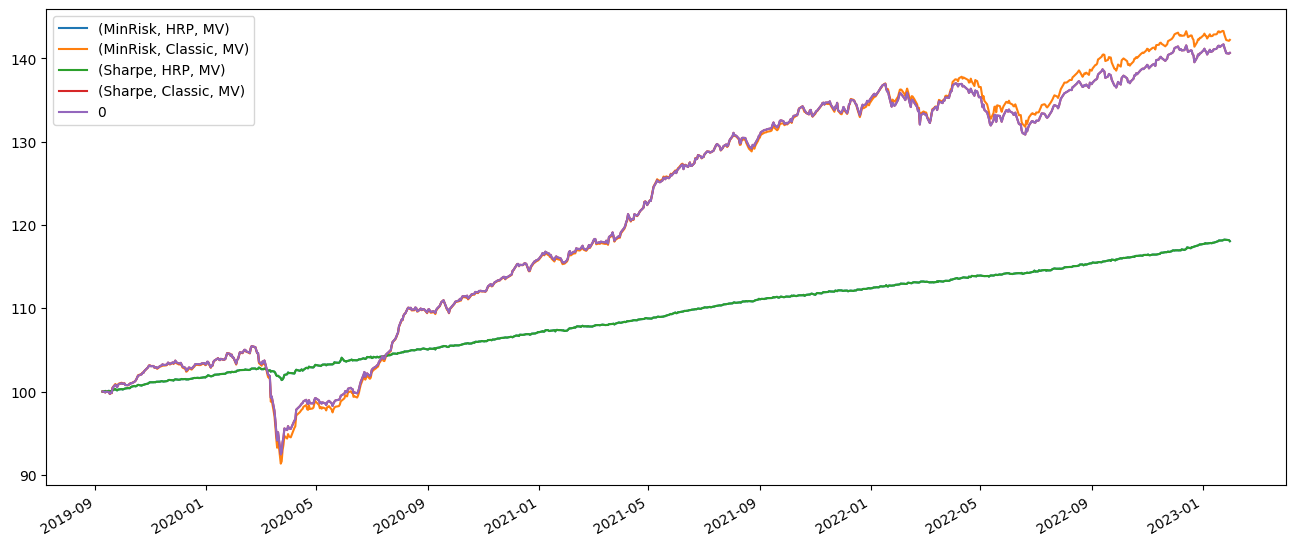

In [34]:
# # Updating NSE Index data
# data_NSE_2 = data_NSE.reindex(values.index).fillna(method='ffill')
# data_NSE_2 = data_NSE_2.to_frame()
# data_NSE_2.columns = ['NIFTY 50']
# a = data_NSE_2 / data_NSE_2.iloc[0] * 100
# display(a)
# b = data_NSE_2.pct_change().vbt.returns(freq='D').stats(0).T
values = pd.concat([values, a], axis=1)
stats = pd.concat([stats, b], axis=1)

fig, ax = plt.subplots(figsize=(16, 7))
values.plot(ax=ax)

In [35]:
stats

,"(MinRisk, HRP, MV)","(MinRisk, Classic, MV)","(Sharpe, HRP, MV)","(Sharpe, Classic, MV)",0
Start,2019-09-09 00:00:00,2019-09-09 00:00:00,2019-09-09 00:00:00,2019-09-09 00:00:00,2019-09-09 00:00:00
End,2023-01-31 00:00:00,2023-01-31 00:00:00,2023-01-31 00:00:00,2023-01-31 00:00:00,2023-01-31 00:00:00
Duration,844 days 00:00:00,844 days 00:00:00,844 days 00:00:00,844 days 00:00:00,844 days 00:00:00
Total Return [%],18.052319,42.221379,18.052319,40.656665,40.656665
Benchmark Return [%],0.0,0.0,0.0,0.0,0.0
Annual Return [%],5.079956,11.089236,5.079956,10.722897,10.722897
Annual Volatility [%],0.98264,5.355744,0.98264,5.048822,5.048822
Sharpe Ratio,5.05406,1.993177,5.05406,2.045624,2.045624
Calmar Ratio,3.47007,0.829265,3.47007,0.870098,0.870098
Max. Drawdown [%],-1.463935,-13.37237,-1.463935,-12.323783,-12.323783


In [36]:
writer = pd.ExcelWriter('MF_weights.xlsx',
                        engine='xlsxwriter')
values.to_excel(writer, sheet_name='Values')
stats.to_excel(writer, sheet_name='Stats')

for i in weights.keys():
    weights[i].to_excel(writer, sheet_name=i)

writer.save()

In [37]:
x = weights['MinRisk-Classic-MV'].columns.tolist()
y = [
    float("{:.3f}".format(element * 100))
    for element in weights['MinRisk-Classic-MV'].iloc[-1].tolist()
]

import plotly.graph_objects as go


text = [['Equity', '% share']]
for k in range(len(x)):
    text.append([x[k], y[k]])
temp_bar_x = []
temp_bar_y = []
for j in text:
    if j[1] != 0:
        temp_bar_x.append(j[0])
        temp_bar_y.append(j[1])
fig = go.Figure(data=[go.Bar(x=[i[:-3] for i in temp_bar_x[1:]], y=temp_bar_y[1:],
                             # hovertext=['27% market share', '24% market share', '19% market share']
                             )])
# fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
# fig.show()


import plotly.figure_factory as ff
colorscale = [[0, '#272D31'], [.5, '#ffffff'], [1, '#ffffff']]
# font = ['#FCFCFC', '#00EE00', '#008B00', '#004F00', '#660000', '#CD0000', '#FF3030']

hodlings = []
for m in text:
    if m[1] != 0:
        hodlings.append(m)

fig = ff.create_table(hodlings, colorscale=colorscale)
fig.layout.width = 250
# fig.show()

# display(weights['HC-HERC-MV']['TCS.NS'])

pd_hodl = pd.DataFrame([])

pd_hodl['Equity'] = temp_bar_x[1:]

pd_hodl['%share'] = temp_bar_y[1:]

pd_hodl.sort_values(by='%share', ascending=False)

,Equity,%share
4,INF174K01302,25.000
6,INF109K01902,25.000
3,INF205K01122,15.000
5,INF760K01282,15.000
7,INF966L01200,14.657
2,INF200K01VS4,2.273
0,INF204K01968,2.236
1,INF200K01446,0.834


In [38]:
# map the pd_hodl equity names to their respective FundName from mf table
pd_hodl['FundName'] = pd_hodl['Equity'].map(mf.set_index('ISIN')['FundName'])

pd_hodl

,Equity,%share,FundName
0,INF204K01968,2.236,Nippon India Pharma Fund-Growth
1,INF200K01446,0.834,SBI Healthcare Opportunities Fund-Growth
2,INF200K01VS4,2.273,SBI Technology Opportunities Fund-Growth
3,INF205K01122,15.000,Invesco India Arbitrage Fund-Growth
4,INF174K01302,25.000,Kotak Equity Arbitrage Fund Regular-Growth
5,INF760K01282,15.000,Canara Robeco Conservative Hybrid Fund Regular...
6,INF109K01902,25.000,ICICI Prudential Regular Savings Fund-Growth
7,INF966L01200,14.657,Quant Multi Asset Fund-Growth
